In [8]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#Loading deep learning algorithm
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import keras
#import keras.backend as K
#from keras.models import Sequential
#from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

IMAGE_SIZE = [224,224]
CLASS=2
inception = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#model = VGG16(weights='imagenet', include_top=False)
for layer in inception.layers:
    layer.trainable = False
#folders = glob('C:\rafid\guava disease research\k_guava\train_image/*')
x = Flatten()(inception.output)
prediction = Dense(CLASS, activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)
adam = keras.optimizers.Adam(lr = 0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer = adam,
  metrics=['accuracy']
)
print("\n\n")
model.summary()




Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_203 (Conv2D)            (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_203 (Batch  (None, 111, 111, 32  96         ['conv2d_203[0][0]']             
 Normalization)                 )                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                                                  
 activation_212 (Activation)    (None, 25, 25, 96)   0           ['batch_normalization_212[0][0]']
                                                                                                  
 average_pooling2d_1 (AveragePo  (None, 25, 25, 192)  0          ['max_pooling2d_5[0][0]']        
 oling2D)                                                                                         
                                                                                                  
 conv2d_208 (Conv2D)            (None, 25, 25, 96)   18432       ['max_pooling2d_5[0][0]']        
                                                                                                  
 conv2d_210 (Conv2D)            (None, 25, 25, 64)   76800       ['activation_209[0][0]']         
                                                                                                  
 conv2d_21

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset Taka/split /train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/Dataset Taka/split /val',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset Taka/split /test',
                                            target_size = (224,224),
                                            batch_size = 1,
                                            class_mode = 'categorical')
print("\n\n")
model.optimizer.get_config()

Found 516 images belonging to 2 classes.
Found 147 images belonging to 2 classes.
Found 75 images belonging to 2 classes.





{'amsgrad': False,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.0,
 'epsilon': 1e-07,
 'learning_rate': 0.001,
 'name': 'Adam'}

In [12]:
filepath = "/content/drive/MyDrive/Dataset Taka/inceptiopn resnetv2/highest_val2.h5"
filepath2 = "/content/drive/MyDrive/Dataset Taka/inceptiopn resnetv2/highest_train2.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')
checkpoint2 = ModelCheckpoint(filepath2, monitor='accuracy', verbose=1,
                             save_best_only=True, mode='max')
callbacks_list = [checkpoint1,checkpoint2]
r = model.fit_generator(
    training_set,
    epochs=16,
    validation_data=val_set,
    steps_per_epoch=len(training_set),
    validation_steps=len(val_set),
    callbacks=callbacks_list
)
model.save_weights("/content/drive/MyDrive/Dataset Taka/inceptiopn resnetv2/end2.h5")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/16
17/17 [==============================] - ETA: 0s - loss: 4.1219 - accuracy: 0.7500 
Epoch 1: val_accuracy improved from -inf to 0.85714, saving model to /content/drive/MyDrive/Dataset Taka/inceptiopn resnetv2/highest_val2.h5

Epoch 1: accuracy improved from -inf to 0.75000, saving model to /content/drive/MyDrive/Dataset Taka/inceptiopn resnetv2/highest_train2.h5
17/17 [==============================] - 705s 41s/step - loss: 4.1219 - accuracy: 0.7500 - val_loss: 4.1086 - val_accuracy: 0.8571
Epoch 2/16
17/17 [==============================] - ETA: 0s - loss: 1.5026 - accuracy: 0.8430 
Epoch 2: val_accuracy did not improve from 0.85714

Epoch 2: accuracy improved from 0.75000 to 0.84302, saving model to /content/drive/MyDrive/Dataset Taka/inceptiopn resnetv2/highest_train2.h5
17/17 [==============================] - 322s 19s/step - loss: 1.5026 - accuracy: 0.8430 - val_loss: 2.1252 - val_accuracy: 0.8571
Epoch 3/16
17/17 [==============================] - ETA: 0s - loss: 0.812

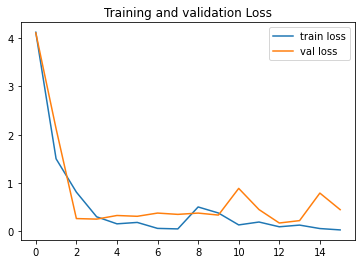

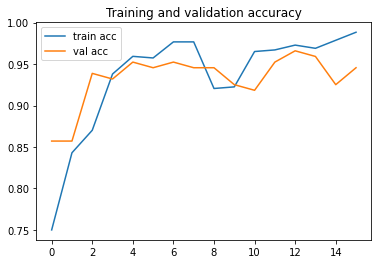

<Figure size 432x288 with 0 Axes>

In [13]:
#plot of accuracy and loss

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [14]:
#evaluating the model (test acc)
#batch size = 32
model.load_weights('/content/drive/MyDrive/Dataset Taka/inceptiopn resnetv2/highest_val2.h5')
preds = model.evaluate_generator(test_set)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


Loss = 0.07433485239744186
Test Accuracy = 0.9599999785423279


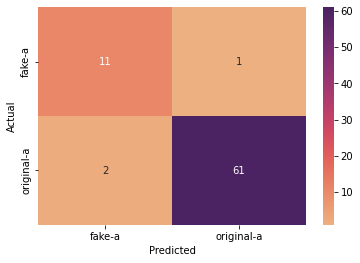

In [15]:
#confusion matrix

#you have to set test bath size=1 before running the cell
import pandas as pd
import seaborn as sn
import tensorflow as tf
model.load_weights('/content/drive/MyDrive/Dataset Taka/inceptiopn resnetv2/highest_val2.h5')
filenames=test_set.filenames
nb_samples=len(test_set)
y_prob=[]
y_act=[]
test_set.reset()
for _ in range (nb_samples):
    X_test,Y_test = test_set.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
predicted_class=[list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class=[list(training_set.class_indices.keys())[i.argmax()]for i in y_act]
out_df=pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix=pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])
import matplotlib.pyplot as plt
sn.heatmap(confusion_matrix,cmap='flare', annot=True, fmt='d')
plt.show()
#plt.savefig('/content/drive/MyDrive/model weights/vgg16_AugGfb_split1_maxval_3')

In [16]:
lst=[r.history['loss'],r.history['val_loss'],r.history['accuracy'],r.history['val_accuracy']]

In [17]:
print(lst)

[[4.121886253356934, 1.5025665760040283, 0.8125073909759521, 0.30146944522857666, 0.156050905585289, 0.18530243635177612, 0.06169161573052406, 0.05101856589317322, 0.5052700638771057, 0.38046520948410034, 0.13361862301826477, 0.19359487295150757, 0.09505002200603485, 0.12992192804813385, 0.05846009403467178, 0.0301430094987154], [4.1085638999938965, 2.1252050399780273, 0.26507794857025146, 0.25360432267189026, 0.32875263690948486, 0.3119199275970459, 0.3787904977798462, 0.3518262803554535, 0.3784654140472412, 0.3371867537498474, 0.8897668719291687, 0.4513827860355377, 0.17324593663215637, 0.22241322696208954, 0.7925592064857483, 0.4494350850582123], [0.75, 0.8430232405662537, 0.8701550364494324, 0.9379844665527344, 0.9593023061752319, 0.9573643207550049, 0.9767441749572754, 0.9767441749572754, 0.9205426573753357, 0.9224806427955627, 0.9651162624359131, 0.9670542478561401, 0.9728682041168213, 0.9689922332763672, 0.9786821603775024, 0.9883720874786377], [0.8571428656578064, 0.85714286565